# Error analysis of models in the vagueness experiments.
The notebook is meant for analyzing errors - systematically looking at PETs which were misclassified, identifying rows for qualitative analysis, etc.

Notes:
What are we seeing? Some of the examples it's getting wrong so far seem to be ones that are truly uncertain (even to me, human) - not clear what the label should be. But some are just plain wrong.
For the PETs analysis, I think I should include a VAGUE label, as well.

In [1]:
import pandas as pd

path = 'Vagueness_Splits/Test_5/PET_balanced_mixed_mixed/'
results = pd.read_csv(path + 'PET_balanced_mixed_mixed_results_unscrambled.csv', index_col=0)

In [3]:
import ast

# keep track of cumulative PET errors from all tests
error_dict = {}

for x in range(0, 10):
    # find the best preds
    test = results.loc[10*x:10*x+9]
    max_f1 = test.loc[test['f1'].idxmax()] # this is the best row from this test
    
    best_preds = max_f1['preds'].replace(' ', ', ') # the labels don't have a comma between them...
    best_preds = ast.literal_eval(best_preds)
    
    # attach them to the examples
    ref_df = pd.read_csv(path + '/test_' + str(x) + '.csv')
    ref_df['preds'] = best_preds
    # display(ref_df)
    # save for qualitative analysis - essentially, just the test file with preds from the best epoch
    ref_df.to_csv('Vagueness_Error_Analysis/test_' + str(x) + '.csv')
    
    # now go through and update the error dict for this test
    for i, row in ref_df.iterrows():
        label = ref_df.loc[i]['is_euph']
        pred = ref_df.loc[i]['preds']
        PET = ref_df.loc[i]['type'] + "_" + str(label)
        vague_label = ref_df.loc[i]['is_vague']
        status = ref_df.loc[i]['euph_status']

        if PET not in error_dict:
            error_dict[PET] = [0, 1, status, vague_label]
        else:
            error_dict[PET][1] += 1

        if (label != pred):
            error_dict[PET][0] += 1

# put the results into a df
error_df = pd.DataFrame(columns = ['PET', 'Incorrect', 'Total', 'pct'])

for PET, e in error_dict.items():
    new_row = pd.Series({'PET': PET,
                         'status':e[2],
                         'vague':e[3],
                    'Incorrect': e[0],
                    'Total': e[1],
                    'pct': round(e[0]/e[1], 3)
                   })
    error_df = pd.concat([error_df, new_row.to_frame().T], ignore_index=True)

error_df = error_df.sort_values(by=['Total'], ascending=False)
    
display(error_df)

,PET,Incorrect,Total,pct,status,vague
52,disabled_1,4,61,0.066,sometimes_euph,1
58,late_0,7,46,0.152,sometimes_euph,0
48,income inequality_1,0,45,0.0,always_euph,1
5,aging_0,26,45,0.578,sometimes_euph,0
12,inner city_1,0,43,0.0,always_euph,1
...,...,...,...,...,...,...
23,latrine_1,1,1,1.0,always_euph,0
149,seasoned_0,0,1,0.0,sometimes_euph,0
135,invalid_0,1,1,1.0,sometimes_euph,0
64,negative cash flow_1,0,1,0.0,always_euph,1


In [5]:
error_df.sto_csv('VET_Test_5_Errors_by_PET_2.csv', sep=',')

In [17]:
results

,f1,precision,recall,tn,fp,fn,tp,preds
0,0.411765,0.700000,1.000000,0,0,60,140,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
1,0.411765,0.700000,1.000000,0,0,60,140,[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1...
2,0.522433,0.721925,0.964286,8,5,52,135,[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0...
3,0.648601,0.771605,0.892857,23,15,37,125,[1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 1 0...
4,0.703192,0.793939,0.935714,26,9,34,131,[1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 1 1 0...
...,...,...,...,...,...,...,...,...
95,0.766996,0.823171,0.964286,31,5,29,135,[1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1...
96,0.789446,0.841772,0.950000,35,7,25,133,[1 1 1 1 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1...
97,0.744607,0.812121,0.957143,29,6,31,134,[1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1...
98,0.740815,0.808383,0.964286,28,5,32,135,[1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 1 1 1 1 1 1...


In [2]:
# populate a certain DF with the preds for error analysis
import ast

x = 1 # the number of the test 

# find the best preds
test = results.loc[10*x:10*x+9]
max_f1 = test.loc[test['f1'].idxmax()] # this is the best row from this test

best_preds = max_f1['preds'].replace(' ', ', ') # the labels don't have a comma between them...
best_preds = ast.literal_eval(best_preds)

# attach them to the examples
ref_df = pd.read_csv(path + '/test_' + str(x) + '.csv')
ref_df['preds'] = best_preds

ref_df
ref_df.to_csv("

,Unnamed: 0,keyword,edited_text,is_euph,category,type,euph_status,sentence,is_vague,preds
0,1039,disabled,"I was homeschooled up until 5th grade, which i...",1,physical/mental attributes,disabled,sometimes_euph,I couldn't help but feel like I was in a schoo...,1,1
1,1032,disabled,I am a <disabled> Vietnam veteran who served h...,1,physical/mental attributes,disabled,sometimes_euph,I am a disabled Vietnam veteran who served hon...,1,1
2,311,inner city,"Faulty logic, irrelevant and/or non-existent r...",1,politics,inner city,always_euph,Having spent the better part of 26 years worki...,1,1
3,308,inner city,SMMNRA hires diverse high school students from...,1,politics,inner city,always_euph,Conservation Corps provides jobs for inner cit...,1,1
4,578,people of color,HEATHER MCGHEE: It's actually these brown and ...,1,physical/mental attributes,people/persons of color,always_euph,HEATHER MCGHEE It's actually these brown and b...,0,1
...,...,...,...,...,...,...,...,...,...,...
195,87,freedom fighters,The fast and furious mentality of arming Ameri...,1,politics,freedom fighter,always_euph,Obama would probably love to fully support the...,1,1
196,1335,troubled,My parents' four and a half decades were not e...,1,physical/mental attributes,troubled,sometimes_euph,Both were refugees from troubled childhoods an...,1,1
197,1784,intoxicated,A form was downloaded from the Internet and fa...,0,substances,intoxicated,sometimes_euph,We were intoxicated in the early stage of this...,1,1
198,723,droppings,bupkes Not a word for polite company. Bubkes o...,1,bodily functions,droppings,always_euph,Bubkes or bobkes may be related to the Polish ...,0,1


# Topic analysis

In [1]:
def read_stopwords(text):
    stopwords = []
    with open(text,'rb') as f:
        content = f.read()
        content = content.split(b'\r\n')
        for line in content:
            stopwords.append(line.decode('utf-8'))
    return stopwords

def sum_similarity(model, phrase, topic_list):
    score = 0
    for topic in topic_list:
        try:
            similarity = model.wv.similarity(phrase, topic)
            # "reward" the phrases with a high similarity to a particular category, but maybe not others
            if (similarity > 0.50):
                # return 1
                score += 1
            # if (similarity > 0):
            #     score += similarity
        except: # if no matches to phrase in w2v model
            score += 0
    return score

def preprocess(s):
    s = s.strip()
    s = re.sub(r'(##\d*\W)|<\w>|,|;|:|--|\(|\)|#|%|\\|\/|\.|\*|\+|@|>|<|\?|!', '', s)
    s = re.sub(r'\s\s+', ' ', s)
    s = s.lower()
    return s

In [2]:
from gensim.models import Word2Vec
import pandas as pd

w2v_path = '../PETDetection/data/wv_model_7'
stopwords_path = '../PETDetection/data/stopwords.txt'

model = Word2Vec.load(w2v_path)
stopwords = read_stopwords(stopwords_path)

In [3]:
import re
full_df = pd.read_csv("VET_Corpus_0.2.csv", index_col=0)
df = pd.read_csv("Vagueness_Errors_4.0.2_base.csv", index_col=0)

full_df['topic_sim_sum'] = -1
full_df['topic_sim_index'] = -1

topic_list = ['politics', 'death', 'kill', 'crime',
       'drugs', 'alcohol', 'fat', 'old', 'poor', 'cheap',
       'sex', 'sexual',
       'employment', 'job', 'disability',
       'pregnant', 'bathroom', 'sickness', 
        'race', 'racial', 'religion', 'government'
      ]

# topic_list = ['die', 'kill']

for i, row in full_df.iterrows():
    text = full_df.loc[i, 'edited_text']
    text = preprocess(text)
    # print(text)
    words = text.split()
    # print(words)
    total_sim = 0 # total amount of topic similarity
    for word in words:
        if (word in stopwords):
            continue
        sim = sum_similarity(model, word, topic_list)
        if (sim == -1):
            total_sim += 10
        else:
            total_sim += sim
        #print(word, sim)
    full_df.loc[i, 'topic_sim_sum'] = total_sim
    full_df.loc[i, 'topic_sim_index'] = total_sim/len(words)
    
df['topic_sim_sum'] = -1
df['topic_sim_index'] = -1

for i, row in df.iterrows():
    text = df.loc[i, 'edited_text']
    text = preprocess(text)
    # print(text)
    words = text.split()
    # print(words)
    total_sim = 0 # total amount of topic similarity
    for word in words:
        if (word in stopwords):
            continue
        sim = sum_similarity(model, word, topic_list)
        if (sim == -1):
            total_sim += 10
        else:
            total_sim += sim
        #print(word, sim)
    df.loc[i, 'topic_sim_sum'] = total_sim
    df.loc[i, 'topic_sim_index'] = total_sim/len(words)

In [4]:
euph_examples = full_df.loc[full_df['is_euph'] == 1]
noneuph_examples = full_df.loc[full_df['is_euph'] == 0]
vague_examples = full_df.loc[full_df['is_vague'] == 1]
nonvague_examples = full_df.loc[full_df['is_vague'] == 0]
euph_vague_examples = euph_examples.loc[euph_examples['is_vague']==1]
noneuph_vague_examples = noneuph_examples.loc[noneuph_examples['is_vague']==1]
euph_nonvague_examples = euph_examples.loc[euph_examples['is_vague']==0]
noneuph_nonvague_examples = noneuph_examples.loc[noneuph_examples['is_vague']==0]

print("EUPH_FULL_DATASET:", len(euph_examples), euph_examples.loc[:, 'topic_sim_sum'].mean(), euph_examples.loc[:, 'topic_sim_index'].mean())
print("NON-EUPH_FULL_DATASET:", len(noneuph_examples), noneuph_examples.loc[:, 'topic_sim_sum'].mean(), noneuph_examples.loc[:, 'topic_sim_index'].mean())
print("VAGUE_FULL_DATASET:", len(vague_examples), vague_examples.loc[:, 'topic_sim_sum'].mean(), vague_examples.loc[:, 'topic_sim_index'].mean())
print("NON-VAGUE_FULL_DATASET:", len(nonvague_examples), nonvague_examples.loc[:, 'topic_sim_sum'].mean(), nonvague_examples.loc[:, 'topic_sim_index'].mean())
print("EUPH_VAGUE_FULL_DATASET:", len(euph_vague_examples), euph_vague_examples.loc[:, 'topic_sim_sum'].mean(), euph_vague_examples.loc[:, 'topic_sim_index'].mean())
print("NON-EUPH_VAGUE_FULL_DATASET:", len(noneuph_vague_examples), noneuph_vague_examples.loc[:, 'topic_sim_sum'].mean(), noneuph_vague_examples.loc[:, 'topic_sim_index'].mean())
print("EUPH_NON-VAGUE_FULL_DATASET:", len(euph_nonvague_examples), euph_nonvague_examples.loc[:, 'topic_sim_sum'].mean(), euph_nonvague_examples.loc[:, 'topic_sim_index'].mean())
print("NON-EUPH_NON-VAGUE_FULL_DATASET:", len(noneuph_nonvague_examples), noneuph_nonvague_examples.loc[:, 'topic_sim_sum'].mean(), noneuph_nonvague_examples.loc[:, 'topic_sim_index'].mean())
print()

cropped_df = df.loc[df['freq'] >= 10]
err_euph_examples = cropped_df.loc[cropped_df['is_euph'] == 1]
err_noneuph_examples = cropped_df.loc[cropped_df['is_euph'] == 0]
err_vague_examples = cropped_df.loc[cropped_df['is_vague'] == 1]
err_nonvague_examples = cropped_df.loc[cropped_df['is_vague'] == 0]
err_euph_vague_examples = err_euph_examples.loc[err_euph_examples['is_vague']==1]
err_noneuph_vague_examples = err_noneuph_examples.loc[err_noneuph_examples['is_vague']==1]
err_euph_nonvague_examples = err_euph_examples.loc[err_euph_examples['is_vague']==0]
err_noneuph_nonvague_examples = err_noneuph_examples.loc[err_noneuph_examples['is_vague']==0]

print("EUPH_ERROR_DATASET:", len(err_euph_examples), err_euph_examples.loc[:, 'topic_sim_sum'].mean(), err_euph_examples.loc[:, 'topic_sim_index'].mean())
print("NON-EUPH_ERROR_DATASET:", len(err_noneuph_examples), err_noneuph_examples.loc[:, 'topic_sim_sum'].mean(), err_noneuph_examples.loc[:, 'topic_sim_index'].mean())
print("VAGUE_ERROR_DATASET:", len(err_vague_examples), err_vague_examples.loc[:, 'topic_sim_sum'].mean(), err_vague_examples.loc[:, 'topic_sim_index'].mean())
print("NON-VAGUE_ERROR_DATASET:", len(err_nonvague_examples), err_nonvague_examples.loc[:, 'topic_sim_sum'].mean(), err_nonvague_examples.loc[:, 'topic_sim_index'].mean())
print("EUPH_VAGUE_ERROR_DATASET:", len(err_euph_vague_examples), err_euph_vague_examples.loc[:, 'topic_sim_sum'].mean(), err_euph_vague_examples.loc[:, 'topic_sim_index'].mean())
print("NON-EUPH_VAGUE_ERROR_DATASET:", len(err_noneuph_vague_examples), err_noneuph_vague_examples.loc[:, 'topic_sim_sum'].mean(), err_noneuph_vague_examples.loc[:, 'topic_sim_index'].mean())
print("EUPH_NON-VAGUE_ERROR_DATASET:", len(err_euph_nonvague_examples), err_euph_nonvague_examples.loc[:, 'topic_sim_sum'].mean(), err_euph_nonvague_examples.loc[:, 'topic_sim_index'].mean())
print("NON-EUPH_NON-VAGUE_ERROR_DATASET:", len(err_noneuph_nonvague_examples), err_noneuph_nonvague_examples.loc[:, 'topic_sim_sum'].mean(), err_noneuph_nonvague_examples.loc[:, 'topic_sim_index'].mean())
# euph_vague_examples = euph_examples.loc[euph_examples['is_vague'] == 1]
# euph_unvague_examples = euph_examples.loc[euph_examples['is_vague'] == 0]
# print(euph_vague_examples.loc[:, 'topic_sim_sum'].mean())
# print(euph_vague_examples.loc[:, 'topic_sim_index'].mean())
# print(euph_unvague_examples.loc[:, 'topic_sim_sum'].mean())
# print(euph_unvague_examples.loc[:, 'topic_sim_index'].mean())
# print()

# noneuph_vague_examples = noneuph_examples.loc[noneuph_examples['is_vague'] == 1]
# noneuph_unvague_examples = noneuph_examples.loc[noneuph_examples['is_vague'] == 0]
# print(noneuph_vague_examples.loc[:, 'topic_sim_sum'].mean())
# print(noneuph_vague_examples.loc[:, 'topic_sim_index'].mean())
# print(noneuph_unvague_examples.loc[:, 'topic_sim_sum'].mean())
# print(noneuph_unvague_examples.loc[:, 'topic_sim_index'].mean())

EUPH_FULL_DATASET: 1383 7.900939985538684 0.1288409387266836
NON-EUPH_FULL_DATASET: 569 5.5834797891036905 0.09190001233924402
VAGUE_FULL_DATASET: 769 6.843953185955787 0.1092213093148404
NON-VAGUE_FULL_DATASET: 1183 7.4733727810650885 0.12382665969308648
EUPH_VAGUE_FULL_DATASET: 408 7.948529411764706 0.12585831108466147
NON-EUPH_VAGUE_FULL_DATASET: 361 5.595567867036011 0.0904182713035185
EUPH_NON-VAGUE_FULL_DATASET: 975 7.881025641025641 0.13008905367842208
NON-EUPH_NON-VAGUE_FULL_DATASET: 208 5.5625 0.0944716878868255

EUPH_ERROR_DATASET: 63 4.095238095238095 0.06948433691319826
NON-EUPH_ERROR_DATASET: 80 7.6 0.12123938467358246
VAGUE_ERROR_DATASET: 66 5.96969696969697 0.09578367216544666
NON-VAGUE_ERROR_DATASET: 77 6.12987012987013 0.10071352774673513
EUPH_VAGUE_ERROR_DATASET: 21 3.5714285714285716 0.05597689022746226
NON-EUPH_VAGUE_ERROR_DATASET: 45 7.088888888888889 0.11436017040317273
EUPH_NON-VAGUE_ERROR_DATASET: 42 4.357142857142857 0.07623806025606626
NON-EUPH_NON-VAGUE_ERROR

In [7]:
full_df.to_csv('Dataset_Topic_Analysis_2.1.csv')

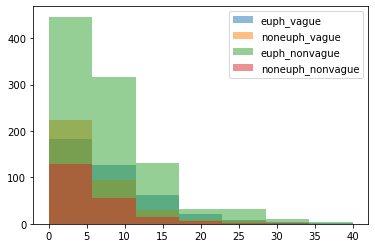

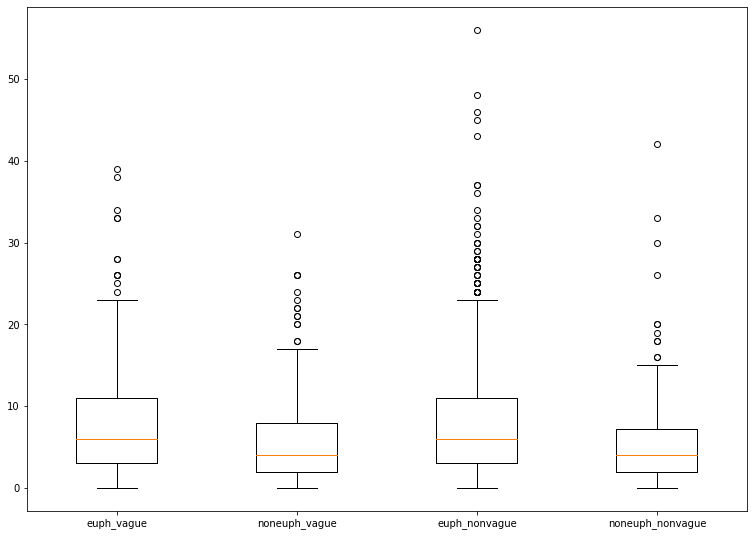

In [24]:
import matplotlib.pyplot as plt
import numpy as np

# x = np.random.normal(170, 10, 250)
a = np.array(euph_vague_examples.loc[:, 'topic_sim_sum'])
b = np.array(noneuph_vague_examples.loc[:, 'topic_sim_sum'])
c = np.array(euph_nonvague_examples.loc[:, 'topic_sim_sum'])
d = np.array(noneuph_nonvague_examples.loc[:, 'topic_sim_sum'])

# histograms
bins = np.linspace(0, 40, 8)
plt.hist(a, bins, alpha=0.5, label='euph_vague')
plt.hist(b, bins, alpha=0.5, label='noneuph_vague')
plt.hist(c, bins, alpha=0.5, label='euph_nonvague')
plt.hist(d, bins, alpha=0.5, label='noneuph_nonvague')
plt.legend(loc='upper right')
plt.show()

# box plot
data = [a, b, c, d]
fig = plt.figure(figsize =(10, 7))
# Creating axes instance
ax = fig.add_axes([0, 0, 1, 1])
# Creating plot

bp = ax.boxplot(data)
plt.xticks([1, 2, 3, 4], ['euph_vague', 'noneuph_vague', 'euph_nonvague', 'noneuph_nonvague'])
# show plot
plt.show()
 

In [ ]:
# Searching through individual training files

In [11]:
import re
import os

for file in os.listdir('TEST_4.0'):
    # if (file[0:4] != 'test'):
    #     continue
    full_df = pd.read_csv('TEST_4.0/' + file, index_col=0)
    # df = pd.read_csv("Vagueness_Errors_1.0.csv", index_col=0)

    full_df['topic_sim_sum'] = -1
    full_df['topic_sim_index'] = -1

    topic_list = ['politics', 'death', 'kill', 'crime',
           'drugs', 'alcohol', 'fat', 'old', 'poor', 'cheap',
           'sex', 'sexual',
           'employment', 'job', 'disability',
           'pregnant', 'bathroom', 'sickness', 
            'race', 'racial', 'religion', 'government'
          ]

    # topic_list = ['die', 'kill']

    for i, row in full_df.iterrows():
        text = full_df.loc[i, 'edited_text']
        text = preprocess(text)
        # print(text)
        words = text.split()
        # print(words)
        total_sim = 0 # total amount of topic similarity
        for word in words:
            if (word in stopwords):
                continue
            sim = sum_similarity(model, word, topic_list)
            if (sim == -1):
                total_sim += 10
            else:
                total_sim += sim
            #print(word, sim)
        full_df.loc[i, 'topic_sim_sum'] = total_sim
        full_df.loc[i, 'topic_sim_index'] = total_sim/len(words)

    print(file)
    euph_examples = full_df.loc[full_df['is_euph'] == 1]
    noneuph_examples = full_df.loc[full_df['is_euph'] == 0]
    vague_examples = full_df.loc[full_df['is_vague'] == 1]
    nonvague_examples = full_df.loc[full_df['is_vague'] == 0]
    euph_vague_examples = euph_examples.loc[euph_examples['is_vague']==1]
    noneuph_vague_examples = noneuph_examples.loc[noneuph_examples['is_vague']==1]
    euph_nonvague_examples = euph_examples.loc[euph_examples['is_vague']==0]
    noneuph_nonvague_examples = noneuph_examples.loc[noneuph_examples['is_vague']==0]
    # print(euph_examples.loc[:, 'topic_sim_sum'].mean())
    # print(noneuph_examples.loc[:, 'topic_sim_sum'].mean())
    print("EUPH_FULL_DATASET:", len(euph_examples), euph_examples.loc[:, 'topic_sim_sum'].mean(), euph_examples.loc[:, 'topic_sim_index'].mean())
    print("NON-EUPH_FULL_DATASET:", len(noneuph_examples), noneuph_examples.loc[:, 'topic_sim_sum'].mean(), noneuph_examples.loc[:, 'topic_sim_index'].mean())
    print("VAGUE_FULL_DATASET:", len(vague_examples), vague_examples.loc[:, 'topic_sim_sum'].mean(), vague_examples.loc[:, 'topic_sim_index'].mean())
    print("NON-VAGUE_FULL_DATASET:", len(nonvague_examples), nonvague_examples.loc[:, 'topic_sim_sum'].mean(), nonvague_examples.loc[:, 'topic_sim_index'].mean())
    print("EUPH_VAGUE_FULL_DATASET:", len(euph_vague_examples), euph_vague_examples.loc[:, 'topic_sim_sum'].mean(), euph_vague_examples.loc[:, 'topic_sim_index'].mean())
    print("NON-EUPH_VAGUE_FULL_DATASET:", len(noneuph_vague_examples), noneuph_vague_examples.loc[:, 'topic_sim_sum'].mean(), noneuph_vague_examples.loc[:, 'topic_sim_index'].mean())
    print("EUPH_NON-VAGUE_FULL_DATASET:", len(euph_nonvague_examples), euph_nonvague_examples.loc[:, 'topic_sim_sum'].mean(), euph_nonvague_examples.loc[:, 'topic_sim_index'].mean())
    print("NON-EUPH_NON-VAGUE_FULL_DATASET:", len(noneuph_nonvague_examples), noneuph_nonvague_examples.loc[:, 'topic_sim_sum'].mean(), noneuph_nonvague_examples.loc[:, 'topic_sim_index'].mean())
    print()

    # df['topic_sim_sum'] = -1
    # df['topic_sim_index'] = -1

    # for i, row in df.iterrows():
    #     text = df.loc[i, 'edited_text']
    #     text = preprocess(text)
    #     # print(text)
    #     words = text.split()
    #     # print(words)
    #     total_sim = 0 # total amount of topic similarity
    #     for word in words:
    #         if (word in stopwords):
    #             continue
    #         sim = sum_similarity(model, word, topic_list)
    #         if (sim == -1):
    #             total_sim += 10
    #         else:
    #             total_sim += sim
    #         #print(word, sim)
    #     df.loc[i, 'topic_sim_sum'] = total_sim
    #     df.loc[i, 'topic_sim_index'] = total_sim/len(words)

test_0.csv
EUPH_FULL_DATASET: 84 7.75 0.11994893125596198
NON-EUPH_FULL_DATASET: 84 6.440476190476191 0.10346531896550912
VAGUE_FULL_DATASET: 84 7.404761904761905 0.11248878406873682
NON-VAGUE_FULL_DATASET: 84 6.785714285714286 0.11092546615273428
EUPH_VAGUE_FULL_DATASET: 42 7.166666666666667 0.10720494210815897
NON-EUPH_VAGUE_FULL_DATASET: 42 7.642857142857143 0.11777262602931471
EUPH_NON-VAGUE_FULL_DATASET: 42 8.333333333333334 0.13269292040376507
NON-EUPH_NON-VAGUE_FULL_DATASET: 42 5.238095238095238 0.08915801190170354

test_1.csv
EUPH_FULL_DATASET: 84 7.869047619047619 0.1181047643340213
NON-EUPH_FULL_DATASET: 84 5.285714285714286 0.08698771470130652
VAGUE_FULL_DATASET: 84 6.428571428571429 0.09597524053475581
NON-VAGUE_FULL_DATASET: 84 6.726190476190476 0.10911723850057202
EUPH_VAGUE_FULL_DATASET: 42 8.714285714285714 0.1248166327554668
NON-EUPH_VAGUE_FULL_DATASET: 42 4.142857142857143 0.06713384831404479
EUPH_NON-VAGUE_FULL_DATASET: 42 7.023809523809524 0.1113928959125759
NON-EUP